In [36]:
import tensorflow as tf
import os
import imageio
import numpy as np

In [37]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imageio.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = ""
train_data_directory = os.path.join(ROOT_PATH, "BelgiumTSC_Training/Training")
test_data_directory = os.path.join(ROOT_PATH, "BelgiumTSC_Testing/Testing")

images, labels = load_data(train_data_directory)

In [38]:
# Print the `images` dimensions
print(np.array(images).ndim)

# Print the number of `images`'s elements
print(np.array(images).size)

# Print the first instance of `images`
images[0]

1
4575


c:\users\erfwi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
c:\users\erfwi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [39]:
# Print the `labels` dimensions
print(np.array(labels).ndim)

# Print the number of `labels`'s elements
print(np.array(labels).size)

# Count the number of labels
print(len(set(labels)))

1
4575
62


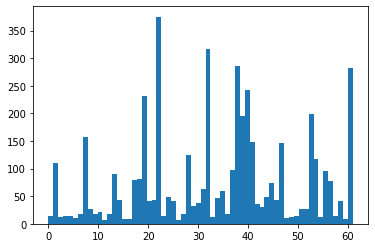

In [40]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

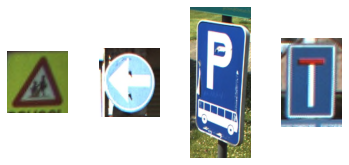

In [41]:
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

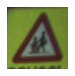

shape: (62, 61, 3), min: 3, max: 160


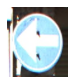

shape: (110, 96, 3), min: 3, max: 255


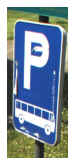

shape: (379, 153, 3), min: 0, max: 255


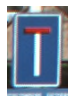

shape: (100, 68, 3), min: 17, max: 255


In [42]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

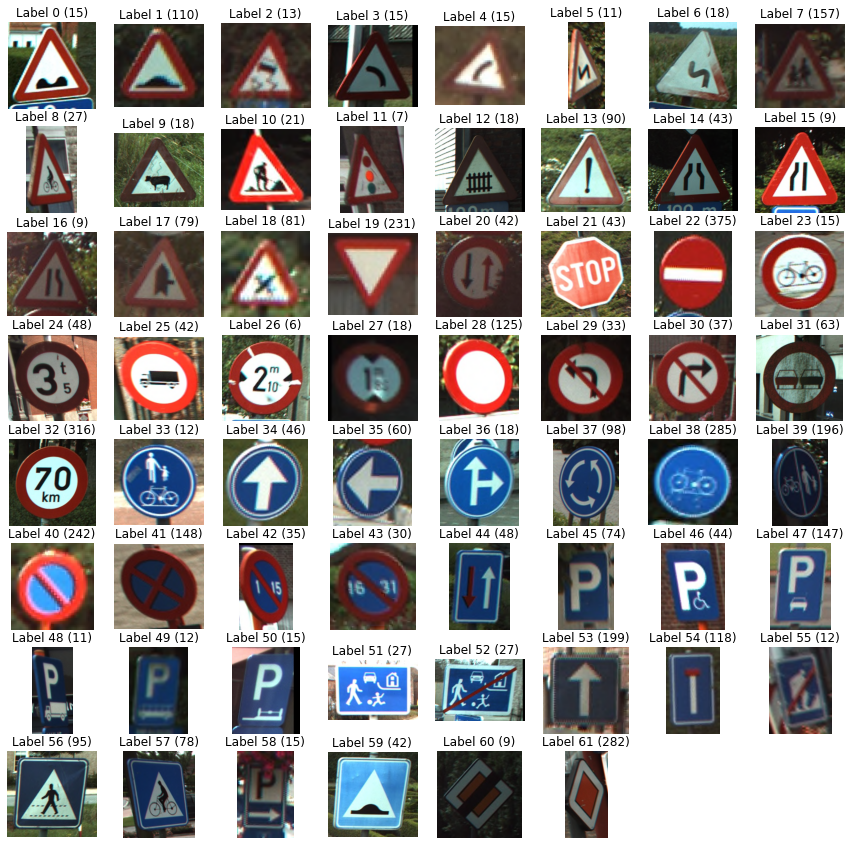

In [43]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [44]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

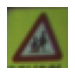

shape: (28, 28, 3), min: 0.06605392156862745, max: 0.607017807122849


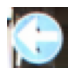

shape: (28, 28, 3), min: 0.08263305322128846, max: 0.996078431372549


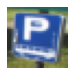

shape: (28, 28, 3), min: 0.12533888555422176, max: 0.9921568627450981


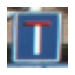

shape: (28, 28, 3), min: 0.08907563025210086, max: 0.9949579831932773


In [45]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

In [46]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

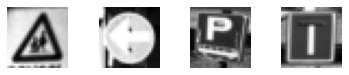

In [47]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [58]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [59]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_7/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_7/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_7:0", shape=(?,), dtype=int64)


In [60]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(1000):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EP

DONE WITH EPOCH
EPOCH 276
DONE WITH EPOCH
EPOCH 277
DONE WITH EPOCH
EPOCH 278
DONE WITH EPOCH
EPOCH 279
DONE WITH EPOCH
EPOCH 280
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 281
DONE WITH EPOCH
EPOCH 282
DONE WITH EPOCH
EPOCH 283
DONE WITH EPOCH
EPOCH 284
DONE WITH EPOCH
EPOCH 285
DONE WITH EPOCH
EPOCH 286
DONE WITH EPOCH
EPOCH 287
DONE WITH EPOCH
EPOCH 288
DONE WITH EPOCH
EPOCH 289
DONE WITH EPOCH
EPOCH 290
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 291
DONE WITH EPOCH
EPOCH 292
DONE WITH EPOCH
EPOCH 293
DONE WITH EPOCH
EPOCH 294
DONE WITH EPOCH
EPOCH 295
DONE WITH EPOCH
EPOCH 296
DONE WITH EPOCH
EPOCH 297
DONE WITH EPOCH
EPOCH 298
DONE WITH EPOCH
EPOCH 299
DONE WITH EPOCH
EPOCH 300
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 301
DONE WITH EPOCH
EPOCH 302
DONE WITH EPOCH
EPOCH 303
DONE WITH EPOCH
EPOCH 304
DONE WITH EPOCH
EPOCH 305
DONE WITH EPOCH
EPOCH 306
DONE WITH EPOCH
EPOCH 307
DONE WITH EP

DONE WITH EPOCH
EPOCH 550
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 551
DONE WITH EPOCH
EPOCH 552
DONE WITH EPOCH
EPOCH 553
DONE WITH EPOCH
EPOCH 554
DONE WITH EPOCH
EPOCH 555
DONE WITH EPOCH
EPOCH 556
DONE WITH EPOCH
EPOCH 557
DONE WITH EPOCH
EPOCH 558
DONE WITH EPOCH
EPOCH 559
DONE WITH EPOCH
EPOCH 560
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 561
DONE WITH EPOCH
EPOCH 562
DONE WITH EPOCH
EPOCH 563
DONE WITH EPOCH
EPOCH 564
DONE WITH EPOCH
EPOCH 565
DONE WITH EPOCH
EPOCH 566
DONE WITH EPOCH
EPOCH 567
DONE WITH EPOCH
EPOCH 568
DONE WITH EPOCH
EPOCH 569
DONE WITH EPOCH
EPOCH 570
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 571
DONE WITH EPOCH
EPOCH 572
DONE WITH EPOCH
EPOCH 573
DONE WITH EPOCH
EPOCH 574
DONE WITH EPOCH
EPOCH 575
DONE WITH EPOCH
EPOCH 576
DONE WITH EPOCH
EPOCH 577
DONE WITH EPOCH
EPOCH 578
DONE WITH EPOCH
EPOCH 579
DONE WITH EPOCH
EPOCH 580
Loss:  Tensor("Mean_14:0", shape=(), d

Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 821
DONE WITH EPOCH
EPOCH 822
DONE WITH EPOCH
EPOCH 823
DONE WITH EPOCH
EPOCH 824
DONE WITH EPOCH
EPOCH 825
DONE WITH EPOCH
EPOCH 826
DONE WITH EPOCH
EPOCH 827
DONE WITH EPOCH
EPOCH 828
DONE WITH EPOCH
EPOCH 829
DONE WITH EPOCH
EPOCH 830
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 831
DONE WITH EPOCH
EPOCH 832
DONE WITH EPOCH
EPOCH 833
DONE WITH EPOCH
EPOCH 834
DONE WITH EPOCH
EPOCH 835
DONE WITH EPOCH
EPOCH 836
DONE WITH EPOCH
EPOCH 837
DONE WITH EPOCH
EPOCH 838
DONE WITH EPOCH
EPOCH 839
DONE WITH EPOCH
EPOCH 840
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 841
DONE WITH EPOCH
EPOCH 842
DONE WITH EPOCH
EPOCH 843
DONE WITH EPOCH
EPOCH 844
DONE WITH EPOCH
EPOCH 845
DONE WITH EPOCH
EPOCH 846
DONE WITH EPOCH
EPOCH 847
DONE WITH EPOCH
EPOCH 848
DONE WITH EPOCH
EPOCH 849
DONE WITH EPOCH
EPOCH 850
Loss:  Tensor("Mean_14:0", shape=(), dtype=float32)
DONE WITH EP

[53, 61, 32, 39, 7, 40, 38, 32, 47, 54]
[53 61 32 39  7 40 38 32 47 54]


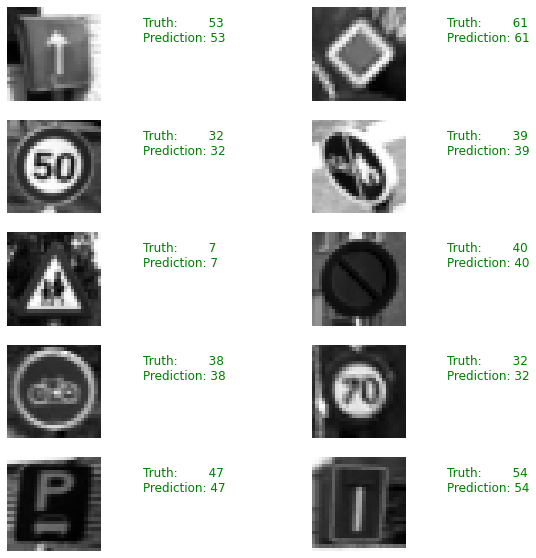

In [61]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [62]:
# Import `skimage`
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

sess.close()

Accuracy: 0.768
